In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv("../../data/processed/lieu-compteur-classes-one-hot-encoded.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204344 entries, 57773 to 1039253
Data columns (total 76 columns):
 #   Column                                                                 Non-Null Count    Dtype 
---  ------                                                                 --------------    ----- 
 0   Jour                                                                   1204344 non-null  int64 
 1   Mois                                                                   1204344 non-null  int64 
 2   Année                                                                  1204344 non-null  int64 
 3   Heure                                                                  1204344 non-null  int64 
 4   Jour_semaine                                                           1204344 non-null  int64 
 5   Jour férié                                                             1204344 non-null  int64 
 6   Vacances scolaires                                                     1204

In [3]:
y = df["Comptage horaire"].replace({
    "0-3": "[00] 0-3",
    "4-9": "[01] 4-9",
    "10-18": "[02] 10-18",
    "19-31": "[03] 19-31",
    "32-46": "[04] 32-46",
    "47-64": "[05] 47-64",
    "65-86": "[06] 65-86",
    "87-115": "[07] 87-115",
    "116-155": "[08] 116-155",
    "156-230": "[09] 156-230",
    "231-450": "[10] 231-450",
    "451+": "[11] 451+",
})
X = df.drop(columns=["Comptage horaire"])

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(X[col_norm])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(col_norm))

encoded_df_clean.index = X.index

X_clean = pd.concat([X.drop(columns=col_norm), encoded_df_clean], axis=1)

In [4]:
X_clean.head()

,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,Nom du site de comptage_102 boulevard de Magenta,Nom du site de comptage_106 avenue Denfert Rochereau,Nom du site de comptage_129 rue Lecourbe,Nom du site de comptage_132 rue Lecourbe,Nom du site de comptage_135 avenue Daumesnil,Nom du site de comptage_147 avenue d'Italie,Nom du site de comptage_152 boulevard du Montparnasse,Nom du site de comptage_16 avenue de la Porte des Ternes,...,Jour_semaine_2,Jour_semaine_3,Jour_semaine_4,Jour_semaine_5,Jour_semaine_6,Jour_semaine_7,Jour férié_0,Jour férié_1,Vacances scolaires_0,Vacances scolaires_1
57773,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1092998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1171485,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
57487,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
57812,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [5]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [6]:
y

array([11, 11, 11, ...,  0,  0,  0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [8]:
params = {
    "criterion": ["gini"],
    "max_depth": [70],
    "min_samples_split": [15],
    "min_samples_leaf": [2],
    "max_features": [None],
}

In [9]:
clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=70, min_samples_split=15, min_samples_leaf=2, max_features='sqrt')
clf.fit(X_train, y_train)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

train score 0.6768260722904071
test score 0.5450473078727441


In [10]:
y_pred = clf.predict(X_test)

In [11]:
y_test = label_enc.inverse_transform(y_test)
y_pred = label_enc.inverse_transform(y_pred)

In [12]:
matrice_confusion = pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])
matrice_confusion

Classes prédites,[00] 0-3,[01] 4-9,[02] 10-18,[03] 19-31,[04] 32-46,[05] 47-64,[06] 65-86,[07] 87-115,[08] 116-155,[09] 156-230,[10] 231-450,[11] 451+
Classes réelles,,,,,,,,,,,,
[00] 0-3,15604,4071,592,307,141,173,123,164,111,130,252,97
[01] 4-9,3508,11849,4315,624,91,53,30,34,21,25,38,18
[02] 10-18,253,4352,10120,4592,658,214,84,39,25,23,31,7
[03] 19-31,71,352,3965,10828,4077,1175,377,150,67,31,42,9
[04] 32-46,43,38,382,4774,8245,4867,1344,473,177,62,40,11
[05] 47-64,52,12,81,846,4183,8912,4784,1535,481,202,56,16
[06] 65-86,51,13,33,193,759,4456,8375,4994,1269,499,128,13
[07] 87-115,34,6,12,73,166,838,4152,9911,4403,1306,291,38
[08] 116-155,27,1,6,19,32,143,655,4624,9694,4432,770,44


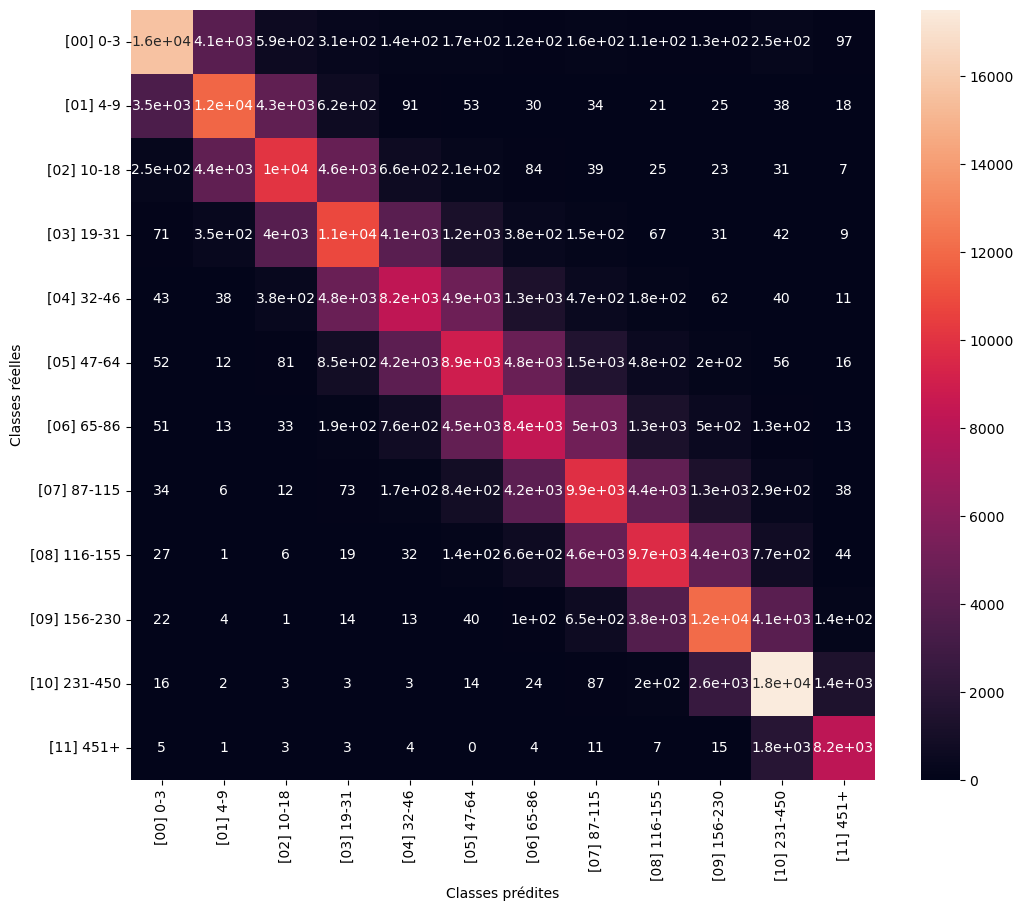

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(matrice_confusion, annot=True)
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    [00] 0-3       0.79      0.72      0.75     21765
    [01] 4-9       0.57      0.58      0.57     20606
  [02] 10-18       0.52      0.50      0.51     20398
  [03] 19-31       0.49      0.51      0.50     21144
  [04] 32-46       0.45      0.40      0.42     20456
  [05] 47-64       0.43      0.42      0.42     21160
  [06] 65-86       0.42      0.40      0.41     20783
 [07] 87-115       0.44      0.47      0.45     21230
[08] 116-155       0.48      0.47      0.48     20447
[09] 156-230       0.56      0.58      0.57     20928
[10] 231-450       0.70      0.80      0.75     21875
   [11] 451+       0.82      0.81      0.82     10077

    accuracy                           0.55    240869
   macro avg       0.55      0.55      0.55    240869
weighted avg       0.54      0.55      0.54    240869

